In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [26]:
np.ones((3, 3)) / 9

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [27]:
def my_average_filter_3x3(src):
    mask = np.ones((3, 3)) / 9
    print(mask)

    # (입력이미지, 리턴타입, 필터)
    dst = cv2.filter2D(src, -1, mask)

    return dst

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


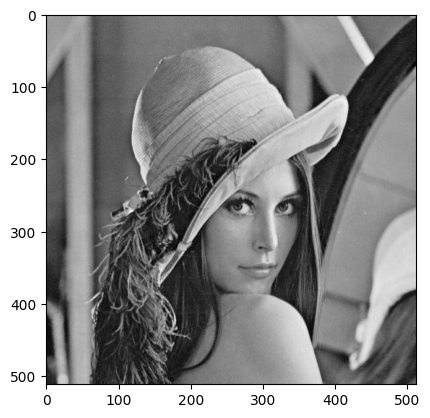

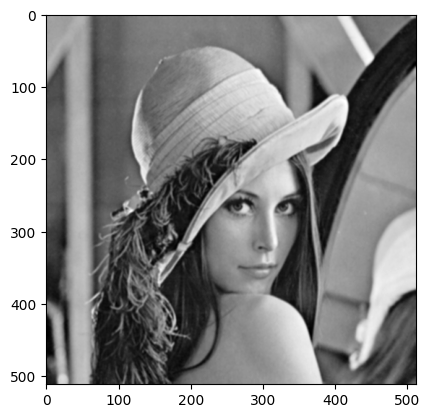

In [28]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
dst = my_average_filter_3x3(src)
plt.imshow(src, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

In [29]:
def my_sharpening_filter_3x3(src):
    zeros = np.zeros((3, 3))
    zeros[1, 1] = 2
    mask = zeros - (np.ones((3, 3)) / 9)
    print(mask)

    # (입력이미지, 리턴타입, 필터)
    dst = cv2.filter2D(src, -1, mask)

    return dst

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


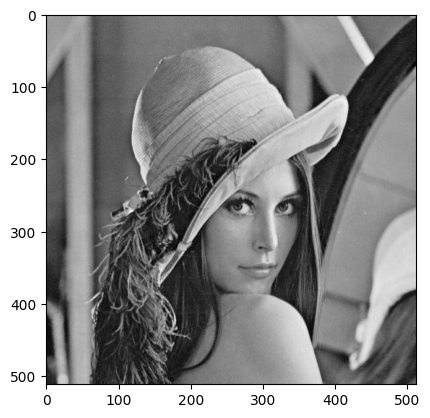

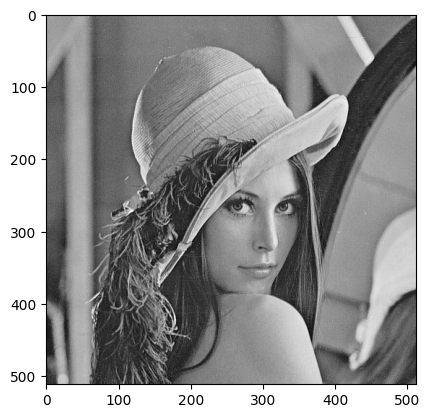

In [30]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
dst = my_sharpening_filter_3x3(src)
plt.imshow(src, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

In [31]:
def my_zero_padding(src, pad_shape):
    (h, w) = src.shape
    (p_h, p_w) = pad_shape
    pad_img = np.zeros((h+2*p_h, w+2*p_w))
    pad_img[p_h:p_h+h, p_w:p_w+w] = src
    return pad_img

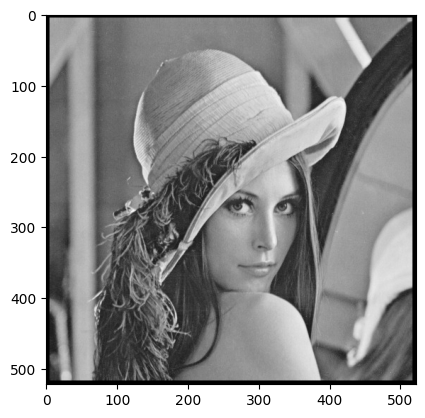

In [32]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
pad_img = my_zero_padding(src, (5, 5))
plt.imshow(pad_img, cmap='gray')
plt.show()

In [33]:
def my_filtering(src, mask):
    #########################################################
    # TODO                                                  #
    # dst 완성                                              #
    # dst : filtering 결과 image                            #
    #########################################################
    h, w = src.shape
    m_h, m_w = mask.shape
    # (m_h, m_w)의 filter 사용 시 m_h//2, m_w//2 만큼 padding이 필요함
    pad_img = my_zero_padding(src, (m_h//2, m_w//2))
    dst = np.zeros((h, w))
    
    """
    반복문을 이용하여 filtering을 완성하기
    """
    for row in range(h):
        for col in range(w):
            val = (pad_img[row: row+m_h, col: col+m_w] * mask).sum()
            val = np.clip(val, 0, 255) #범위를 0~255로 조정
            dst[row, col] = val

    dst = (dst+0.5).astype(np.uint8) #uint8의 형태로 조정

    return dst

In [34]:
h, w = 3, 3
y, x = np.mgrid[-(h//2): h//2+1, -(w//2): w//2+1]
y, x

(array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

In [35]:
y, x = np.mgrid[-1:2, -1:2]
y, x

(array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

In [36]:
def my_get_Gaussian2D_mask(msize, sigma=1):
    #########################################
    # ToDo
    # 2D gaussian filter 만들기
    #########################################
    (h, w) = msize
    y, x = np.mgrid[-(h//2): h//2+1, -(w//2): w//2+1]
    '''
    y, x = np.mgrid[-1:2, -1:2]
    y = [[-1,-1,-1],
         [ 0, 0, 0],
         [ 1, 1, 1]]
    x = [[-1, 0, 1],
         [-1, 0, 1],
         [-1, 0, 1]]
    '''
    # 파이 => np.pi 를 쓰시면 됩니다.
    # 2차 gaussian mask 생성
    gaus2D = 1 / (2 * np.pi * sigma ** 2) * np.exp(-((x**2 + y**2)/(2* sigma**2)))
    # mask의 총 합 = 1
    gaus2D /= gaus2D.sum()

    return gaus2D

In [37]:
(1/(2*np.pi)) * np.exp(-4)

0.0029150244650281935

In [38]:
msize = (3, 3)
my_get_Gaussian2D_mask(msize)

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [39]:
cv2.getGaussianKernel(ksize=5, sigma=1) * cv2.getGaussianKernel(ksize=5, sigma=1).T

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [40]:
def my_get_Gaussian1D_mask(msize, sigma=1):
    #########################################
    # ToDo
    # 1D gaussian filter 만들기
    #########################################
    x = np.full((1, msize), [range(-(msize // 2), (msize // 2) + 1)])
    '''
    x = np.full((1, 3), [-1, 0, 1])
    x = [[ -1, 0, 1]]

    x = np.array([[-1, 0, 1]])
    x = [[ -1, 0, 1]]
    '''

    # 파이 => np.pi 를 쓰시면 됩니다.
    gaus1D = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x**2 / (2 * sigma**2)))

    # mask의 총 합 = 1
    gaus1D /= gaus1D.sum()
    return gaus1D

In [41]:
cv2.getGaussianKernel(ksize=5, sigma=1).T

array([[0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868]])

In [42]:
msize = 5
my_get_Gaussian1D_mask(msize)

array([[0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868]])

In [43]:
def my_mask(ftype, fshape, sigma=1):
    if ftype == 'average':
        print('average filtering')
        ###################################################
        # TODO                                            #
        # mask 완성                                       #
        ###################################################
        mask = np.ones(fshape) / (fshape[0] * fshape[1])

        #mask 확인
        print(mask)

    elif ftype == 'sharpening':
        print('sharpening filtering')
        ##################################################
        # TODO                                           #
        # mask 완성                                      #
        ##################################################

        base_mask = np.zeros(fshape)
        base_mask[fshape[0]//2, fshape[1]//2] = 2
        aver_mask = np.ones(fshape) / (fshape[0] * fshape[1])
        mask = base_mask - aver_mask

        #mask 확인
        print(mask)

    elif ftype == 'gaussian2D':
        print('gaussian filtering')
        ##################################################
        # TODO                                           #
        # mask 완성                                      #
        ##################################################
        mask = my_get_Gaussian2D_mask(fshape, sigma=sigma)
        #mask 확인
        print(mask)

    elif ftype == 'gaussian1D':
        print('gaussian filtering')
        ##################################################
        # TODO                                           #
        # mask 완성                                      #
        ##################################################
        mask = my_get_Gaussian1D_mask(fshape, sigma=sigma)
        #mask 확인
        print(mask)

    return mask

In [44]:
cv2.getGaussianKernel(ksize=3, sigma=1) * cv2.getGaussianKernel(ksize=3, sigma=1).T

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [45]:
cv2.getGaussianKernel(ksize=3, sigma=1).T

array([[0.27406862, 0.45186276, 0.27406862]])

average filtering
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
sharpening filtering
[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]
gaussian filtering
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
gaussian filtering
[[0.27406862 0.45186276 0.27406862]]
2431583


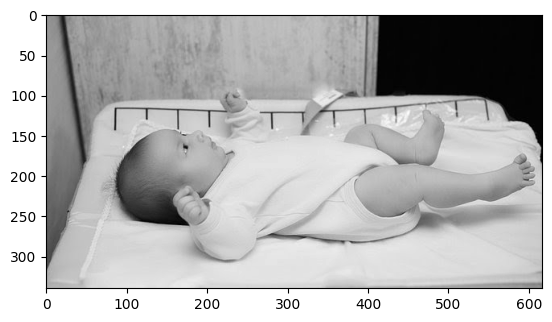

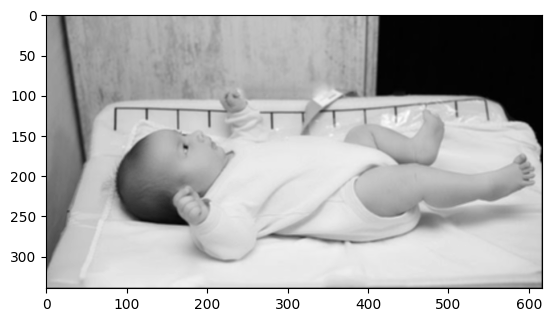

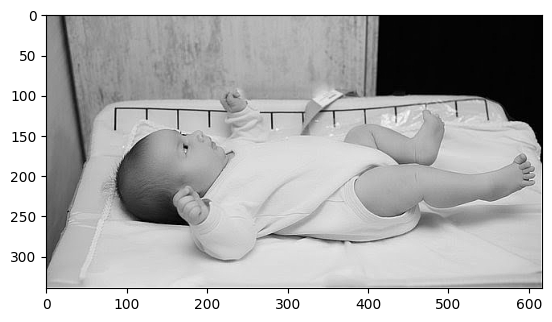

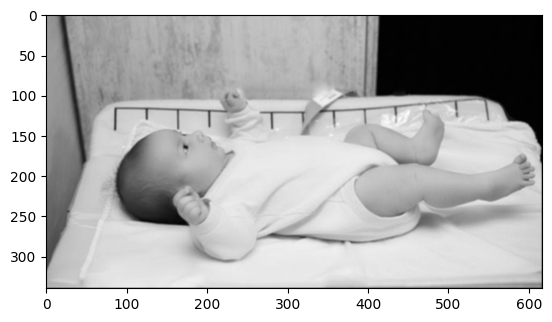

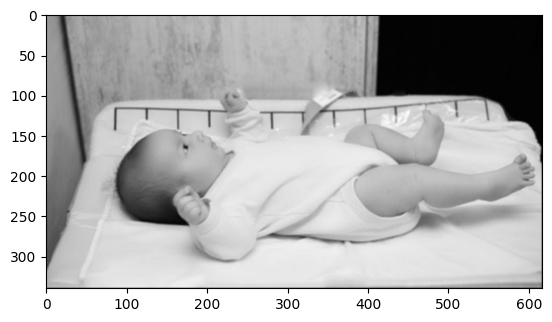

In [46]:
src = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

# 3x3 filter
average_mask = my_mask('average', (3, 3))
sharpening_mask = my_mask('sharpening', (3, 3))

#원하는 크기로 설정
#dst_average = my_filtering(src, 'average', (5,5))
#dst_sharpening = my_filtering(src, 'sharpening', (5,5))

# 11x13 filter
#dst_average = my_filtering(src, 'average', (5,3), 'repetition')
#dst_sharpening = my_filtering(src, 'sharpening', (5,3), 'repetition')
#dst_average = my_filtering(src, 'average', (11,13))
#dst_sharpening = my_filtering(src, 'sharpening', (11,13))


dst_average = my_filtering(src, average_mask)
dst_sharpening = my_filtering(src, sharpening_mask)

# Gaussian filter
gaussian2d_mask = my_mask('gaussian2D', (3, 3), sigma=1)
gaussian1d_mask = my_mask('gaussian1D', 3, sigma=1)

dst_gaussian2d = my_filtering(src, gaussian2d_mask)

dst_gaussian1d = my_filtering(src, gaussian1d_mask.T)
dst_gaussian1d = my_filtering(dst_gaussian1d, gaussian1d_mask)

print((dst_gaussian2d - dst_gaussian1d).sum())

plt.imshow(src, cmap='gray')
plt.show()
plt.imshow(dst_average, cmap='gray')
plt.show()
plt.imshow(dst_sharpening, cmap='gray')
plt.show()
plt.imshow(dst_gaussian2d, cmap='gray')
plt.show()
plt.imshow(dst_gaussian1d, cmap='gray')
plt.show()

# cv2.imshow('original', src)
# cv2.imshow('average filter', dst_average)
# cv2.imshow('sharpening filter', dst_sharpening)
# cv2.imshow('gaussian2D filter', dst_gaussian2d)
# cv2.imshow('gaussian1D filter', dst_gaussian1d)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [48]:
(dst_gaussian1d != dst_gaussian2d).sum()


19599